Name:
Student ID:

In [2]:
from xml.dom.minidom import parse 
import xml.dom.minidom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
data = {'userid':[], 'text':[], 'answer':[], 'severity':[]}

In [5]:
DOMTree = parse("XMLMergedFile.xml")
collection = DOMTree.documentElement
formsprings = collection.getElementsByTagName("FORMSPRINGID") 
print("Total entries: ", len(formsprings))
textCount = 0
formspringsCount = 0

Total entries:  50


*Deciding final label for every post w/ question and answer, selecting final label based on the majority voting scheme

In [6]:
for f in formsprings:
    uid = f.getElementsByTagName("USERID")[0]
    userid = uid.firstChild.data
    
    formspringsCount += 1
    
    posts = f.getElementsByTagName("POST")
    postCount = 0
    for p in posts:
        data['userid'].append(userid)
        postCount += 1
        
        text = p.getElementsByTagName("TEXT")[0]
        textData = text.firstChild.data
        data['text'].append(textData)
        textCount += 1
        
        # Using try and except block to handle corrupted and missing values
        # Assigning "-1" to handle such errors
        try:
            ans1 = p.getElementsByTagName("ANSWER")[0]
            # getting the content of the first child node of the given "Answer" element             
            answer1 = ans1.firstChild.data
        except:
            answer1 = "-1"
            
        try:
            sever1 = p.getElementsByTagName("SEVERITY")[0]
            severity1 = int(sever1.firstChild.data)
            if severity1 == 'n/a':
                severity1 = '-1'
        except:
            severity1 = '-1'
            
        # Continuing to extract answer and severity from the two more sibling nodes by chaning the index
        # value from 0 to 1 for 2.
        
        # AS PER THE QUESTION REQUIREMENT, WE HAVE TO ADD TWO BLOCKS OF CODE INORDER TO RUN THE PROGRAM
        # I HAVE ADDED FOLLOWING BLOCKS OF "ANSWER" AND "SEVERITY" CODES TO EXTRACT ANSWER AND SEVERITY
        # FROM TWO MORE SIBLINGS. THE FOLLOWING CODE REPRESENTS THE CHANGES THAT WERE DONE. 
        
        # START CODE    
        # FIRST SIBLING
        try:
            ans2 = p.getElementsByTagName("ANSWER")[1]             
            answer2 = ans2.firstChild.data
        except:
            answer2 = "-1"
        try:
            sever2 = p.getElementsByTagName("SEVERITY")[1]
            severity2 = int(sever2.firstChild.data)
            if severity2 == 'n/a':
                severity2 = '-1'
        except:
            severity2 = '-1'
        
        # SECOND SIBLING
            
        try:
            ans3 = p.getElementsByTagName("ANSWER")[2]             
            answer3 = ans3.firstChild.data
        except:
            answer3 = "-1" 
        try:
            sever3 = p.getElementsByTagName("SEVERITY")[2]
            severity3 = int(sever3.firstChild.data)
            if severity3 == 'n/a':
                severity3 = '-1'
        except:
            severity3 = '-1'
        
        # END CODE
            
        #Continue to extract answer and severity from the two more 
        #sibling nodes by changing the index value from 0 to 1 for 2. 
        #Decide final answer based on the majority voting
        if ( (answer1 == answer2) | (answer1 == answer3) ):
            answer = answer1
        elif( (answer2 == answer1) | (answer2 == answer3) ): 
            answer = answer3
          #print(answer);
        else:
            answer = answer2
          #print(answer);
        data['answer'].append(answer)
        #Select the maximum value of severity 
        sev = [severity1, severity2, severity3] 
        sev_out = np.array(sev, dtype = np.int) 
        severity = np.max(sev_out) 
        data['severity'].append(severity)

In [7]:
print("# Text: ", textCount) 
DF = pd.DataFrame(data) 
DF.head()

# Text:  13159


,userid,text,answer,severity
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,No,0
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,No,0
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,No,0
3,aprilpooh15,Q: (:<br>A: ;(,No,0
4,aprilpooh15,Q: ******************MEOWWW*******************...,No,0


In [8]:
DF['answer'].value_counts()

No     12295
Yes      852
-1        12
Name: answer, dtype: int64

In [9]:
 DF[DF.answer == "-1"]

,userid,text,answer,severity
2827,h0ttb0i,Q: $+0p ly!nq. ! $@vv y0 d!(k<br>A: nope,-1,4
3204,tabithalocascio,Q: are you a vergin<br>A: hhaahahha YES!,-1,1
4291,bksully,Q: where do you live?<br>A: Billings? Hah.,-1,3
5070,lauraaatxd,Q: kasey is amazing<3 your the stupid skank wh...,-1,10
5139,lauraaatxd,Q: people say ur a bitchh i didnt kno u lyk da...,-1,8
5230,lauraaatxd,Q: When are you going to dump tony he way to u...,-1,3
5261,lauraaatxd,Q: why dont you hate natasha<br>A: why would i...,-1,4
6308,zooshay,Q: I&apos;ve got a whopping great penis can I...,-1,8
8053,avlarios,Q: ihatepeople.<br>A: fuk dem sluttz,-1,5
8909,kellyblake1,Q: Brooke Davis; GREATEST PERSON IN THE WORLD ...,-1,0


In [10]:
DF['answer'].value_counts()

No     12295
Yes      852
-1        12
Name: answer, dtype: int64

In [11]:
 DF['userid'].unique()

array(['aguitarplayer94', 'aprilpooh15', 'emmarie951', 'guiltyypleasure',
       'jardenwilson', 'joielovesu', 'moonbeemashlee', 'nicomm',
       'pacmandan', 'teaachgee', 'andrea9390', 'ayyeeitscassidy',
       'chingfanclub', 'dearalexiis', 'h0ttb0i', 'jesuschristttt',
       'kathrenschillin', 'rexxxxxx', 'tabithalocascio', 'xxrachxx',
       'batmanstar22', 'bksully', 'brocahantas', 'freshswagg21',
       'jayslaffey', 'joebespicyy', 'joewhite', 'lauraaatxd',
       'stfuiinnocencex', 'zooshay', 'acaciiaaa', 'adifferentme09',
       'alexpiink', 'autumnatl', 'avlarios', 'cag23', 'danitbretter',
       'eatthebaby', 'lizzaahh', 'simoaaa', 'arynmariee', 'fafizhott',
       'kellyblake1', 'kennaprettyaf', 'lalabitches', 'likabby',
       'maurice28', 'misslauren777', 'outlaw9000', 'xoaall13'],
      dtype=object)

In [12]:
DF['severity'].value_counts()

0     11043
1       375
2       298
3       267
5       223
4       194
6       187
7       173
10      163
8       156
9        80
Name: severity, dtype: int64

In [13]:
 DF['userid'].unique()

array(['aguitarplayer94', 'aprilpooh15', 'emmarie951', 'guiltyypleasure',
       'jardenwilson', 'joielovesu', 'moonbeemashlee', 'nicomm',
       'pacmandan', 'teaachgee', 'andrea9390', 'ayyeeitscassidy',
       'chingfanclub', 'dearalexiis', 'h0ttb0i', 'jesuschristttt',
       'kathrenschillin', 'rexxxxxx', 'tabithalocascio', 'xxrachxx',
       'batmanstar22', 'bksully', 'brocahantas', 'freshswagg21',
       'jayslaffey', 'joebespicyy', 'joewhite', 'lauraaatxd',
       'stfuiinnocencex', 'zooshay', 'acaciiaaa', 'adifferentme09',
       'alexpiink', 'autumnatl', 'avlarios', 'cag23', 'danitbretter',
       'eatthebaby', 'lizzaahh', 'simoaaa', 'arynmariee', 'fafizhott',
       'kellyblake1', 'kennaprettyaf', 'lalabitches', 'likabby',
       'maurice28', 'misslauren777', 'outlaw9000', 'xoaall13'],
      dtype=object)

In [14]:
DF['severity'].value_counts()

0     11043
1       375
2       298
3       267
5       223
4       194
6       187
7       173
10      163
8       156
9        80
Name: severity, dtype: int64

In [15]:
 DF.shape

(13159, 4)

*Visualizing class distribution in the dataset

Text(0.5, 1.0, 'Stats of bullying and non-bullying posts')

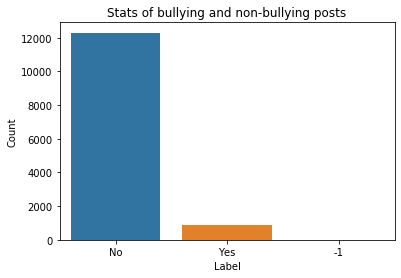

In [16]:
sns.countplot(DF.answer)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Stats of bullying and non-bullying posts')

In [17]:
DF = DF[DF.answer != "-1"] 
DF['answer'].value_counts()

No     12295
Yes      852
Name: answer, dtype: int64

Text(0.5, 1.0, 'Stats of bullying and non-bullying posts')

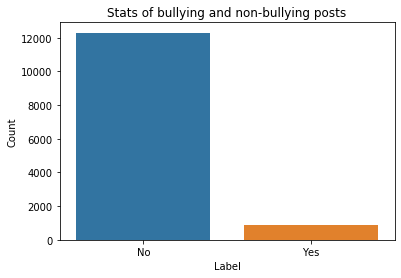

In [18]:
sns.countplot(DF.answer)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Stats of bullying and non-bullying posts')

In [19]:
to_undersample = np.random.choice(DF[DF['answer']=='No'].index, size=7493,replace=False)
DF = DF.drop(to_undersample)
print('After undersampling: ',len(DF))

After undersampling:  5654


In [20]:
print(DF[(DF.answer=='No')].shape) 
print(DF[(DF.answer=='Yes')].shape)

(4802, 4)
(852, 4)


Text(0.5, 1.0, 'Stats of bullying and non-bullying posts')

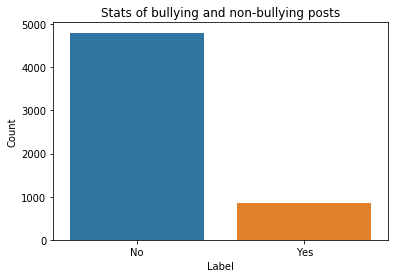

In [21]:
sns.countplot(DF.answer)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Stats of bullying and non-bullying posts')

In [22]:
DF['answer'].value_counts()

No     4802
Yes     852
Name: answer, dtype: int64

In [23]:
from os import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
text = []
tc = 0
for t in DF.text:
    text.append(t) 
    tc +=1
    
all_text = " ".join(t for t in text)
print("Total words in all posts: ", len(all_text))

Total words in all posts:  742607


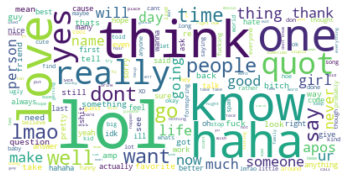

In [27]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im"]) #add words you don't want to include in wordcloud 

# Generate a wordcloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text) # Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the generated image to a file with a proper file name 
wordcloud.to_file("1928447_wc.png")

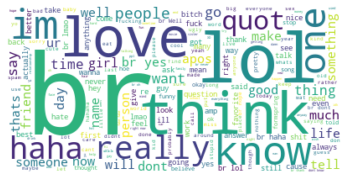

In [28]:
wordcloud = WordCloud( background_color="white").generate(all_text) # Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the generated image to a file with a proper file name
wordcloud.to_file("1928447ii_wc.png")

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Embedding 
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
from keras.models import Sequential

Using TensorFlow backend.


*Creating a LSTM NN including at least Embedding and LSTM layers

In [32]:
X = DF.text
Y = DF.answer
le = LabelEncoder()
Y = le.fit_transform(Y) 
Y = Y.reshape(-1,1)

In [34]:
max_words = 1000
max_len = 200
token = Tokenizer(num_words=max_words)
token.fit_on_texts(X)
sequences = token.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len) 
print(Y.shape)
print(sequences_matrix.shape)

(5654, 1)
(5654, 200)


In [35]:
# Set appropriate class weight for your dataset
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, Y, test_size=0.15, random_state = 0)

In [38]:
#Build a NN model with the first layer as Embedding and the next 
#layer as LSTM
model = Sequential()
model.add(Embedding(max_words, 50, input_length=200)) 
model.add(LSTM(64))
model.add(Dense(256,activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 96,337
Trainable params: 96,337
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Try increasing the epochs
model.fit(X_train, Y_train, epochs=1, verbose=1) #evaluate the model

/Users/prakashgautam/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
4805/4805 [==============================] - 59s 12ms/step - loss: 0.3808 - accuracy: 0.8556


In [41]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=1) 
print('Accuracy: %f' % (accuracy*100))
print('Loss: %f' % (loss))

849/849 [==============================] - 3s 4ms/step
Accuracy: 90.223795
Loss: 0.275015


In [42]:
 predictions=model.predict(X_test,verbose=1)

849/849 [==============================] - 3s 4ms/step


In [43]:
 confusion_matrix=confusion_matrix(Y_test,predictions.round())

In [44]:
 confusion_matrix

array([[731,   8],
       [ 75,  35]])

In [45]:
 print(classification_report(Y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       739
           1       0.81      0.32      0.46       110

    accuracy                           0.90       849
   macro avg       0.86      0.65      0.70       849
weighted avg       0.89      0.90      0.88       849



In [46]:
#Discus your understanding in no more than 500 words:
#Do it yourself

Here we are given dataset in xml format which consist various texts sent through various id from different location to analuze cyberbullying. We tried to solve missing value problem by using try catch block and providing value -1. There are 13169 texts in the data among them 12229 had no as answer, 852 had yes and 12 had missing values. The missing value was very small so we ignored it.</br>

But Here we can see serious imbalance between the number of texts with negative answer and positive answer('no' class and 'yes' class. So we implemented undersampling.Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution. In our case "no' is majority class and 'Yes' is minority class.Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution. Here we removed 7493 no classes from our dataset to make it less imbalanced</br>

There are  742607 words in the text of data set. We created 2 words cloud one with stop word and another without it. In wordcloud the size of word shows its frequency.</br>

Then we created LSTM network for deep learning process.We trained the model with the text dataset to check severity The accuracy of our model was very good at 90%.
